#Importing Training Dataset

In [ ]:
import pandas as pd
df=pd.read_csv('/content/train.csv')
df.sample(5)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
1002813,1002813,20.0,Female,16913.0,Single,4.0,PhD,Unemployed,7.057068,Urban,...,2.0,18.0,690.0,3.0,2022-10-07 15:21:39.202448,Poor,Yes,Monthly,House,227.0
1624,1624,52.0,Female,6988.0,Divorced,NaN,Bachelor's,Self-Employed,23.070173,Urban,...,1.0,13.0,488.0,2.0,2021-02-04 15:21:39.250151,Average,No,Daily,Apartment,1078.0
1067697,1067697,27.0,Male,149895.0,Married,NaN,PhD,Employed,22.304947,Urban,...,NaN,8.0,785.0,1.0,2023-03-23 15:21:39.126661,Average,No,Rarely,Apartment,191.0
483244,483244,45.0,Male,43923.0,Married,4.0,Bachelor's,NaN,49.592459,Urban,...,2.0,9.0,593.0,3.0,2020-12-01 15:21:39.194829,Average,Yes,Rarely,House,1332.0
1177336,1177336,51.0,Male,4540.0,Divorced,4.0,High School,Unemployed,52.914485,Suburban,...,1.0,13.0,663.0,8.0,2023-03-10 15:21:39.167099,Average,Yes,Daily,Apartment,627.0


#Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [ ]:
df.duplicated().sum()

0

There is no duplicates.

In [ ]:
df.isnull().mean() * 100

,0
id,0.000000
Age,1.558750
Gender,0.000000
Annual Income,3.745750
Marital Status,1.544083
Number of Dependents,9.139333
Education Level,0.000000
Occupation,29.839583
Health Score,6.173000
Location,0.000000


**There are null values in the dataset**

**Key Observations**

**High Missing Values:**

Occupation: 29.84%
Previous Claims: 30.34%
Credit Score: 11.49%
Number of Dependents: 9.14%

**Moderate Missing Values:**

Health Score: 6.17%
Customer Feedback: 6.49%

**Low or No Missing Values:**

Vehicle Age at 0.0005%.



In [ ]:
df.drop('id',inplace=True,axis=1)

id columns is not required for the analysis

#2.1 Handling Missing Values

In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Annual Income'].fillna(df['Annual Income'].mean(),inplace=True)
df['Marital Status'].fillna(df['Marital Status'].mode()[0],inplace=True)
df['Health Score'].fillna(df['Health Score'].mean(),inplace=True)
df['Customer Feedback'].fillna(df['Customer Feedback'].mode()[0],inplace=True)
df['Vehicle Age'].fillna(df['Vehicle Age'].mode()[0],inplace=True)
df['Number of Dependents'].fillna(df['Number of Dependents'].mode()[0],inplace=True)
df['Credit Score'].fillna(df['Credit Score'].mean(),inplace=True)
df['Previous Claims'].fillna(df['Previous Claims'].mean(),inplace=True)
df['Occupation'].fillna(df['Occupation'].mode()[0],inplace=True)
df['Insurance Duration'].fillna(df['Insurance Duration'].mode()[0],inplace=True)

<ipython-input-6-ae034d40b383>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)
<ipython-input-6-ae034d40b383>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Annual Income,0
Marital Status,0
Number of Dependents,0
Education Level,0
Occupation,0
Health Score,0
Location,0
Policy Type,0


#EDA- Exploratory Data Analysis

In [ ]:
Num_col=df.select_dtypes(include='number').columns
Num_col

Index(['Age', 'Annual Income', 'Number of Dependents', 'Health Score',
       'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration',
       'Premium Amount'],
      dtype='object')

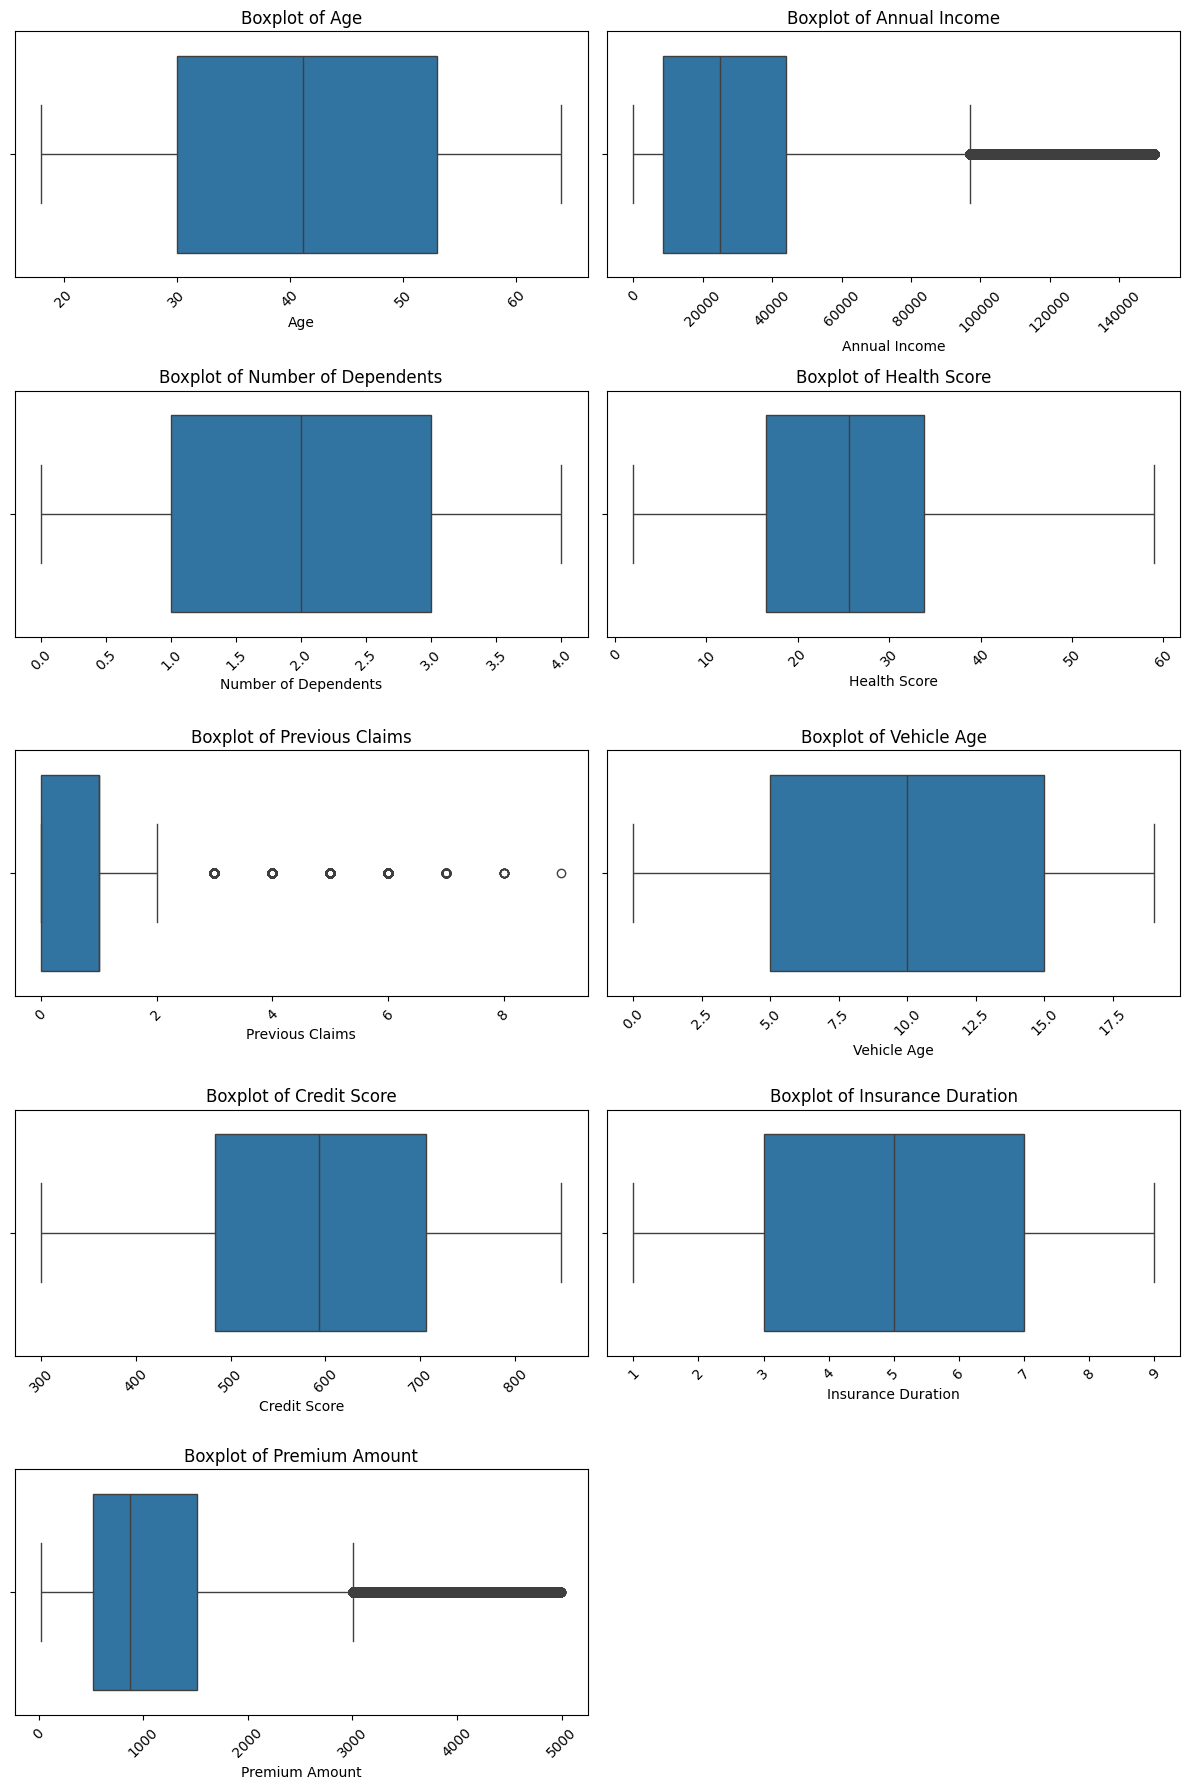

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 18))

for i in range(9):
    col = Num_col[i]
    plt.subplot(5, 2, i + 1)
    sns.boxplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


In [ ]:
cat_col=df.select_dtypes(exclude='number').columns
cat_col

Index(['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location',
       'Policy Type', 'Policy Start Date', 'Customer Feedback',
       'Smoking Status', 'Exercise Frequency', 'Property Type'],
      dtype='object')

In [ ]:
sample_df = df.sample(frac=0.01, random_state=42)

In [ ]:
for col in ['Gender', 'Marital Status', 'Occupation', 'Vehicle Age']:
    print(f"{col}:\n{sample_df[col].value_counts()}\n")

Gender:
Gender
Male      6043
Female    5957
Name: count, dtype: int64

Marital Status:
Marital Status
Single      4119
Married     4008
Divorced    3873
Name: count, dtype: int64

Occupation:
Occupation
Employed         6413
Self-Employed    2819
Unemployed       2768
Name: count, dtype: int64

Vehicle Age:
Vehicle Age
11.0    665
17.0    640
2.0     627
5.0     625
19.0    624
9.0     604
0.0     603
10.0    602
4.0     602
15.0    601
16.0    599
12.0    596
6.0     590
13.0    587
14.0    586
7.0     579
18.0    578
8.0     574
1.0     565
3.0     553
Name: count, dtype: int64



Observation: Balanced dataset

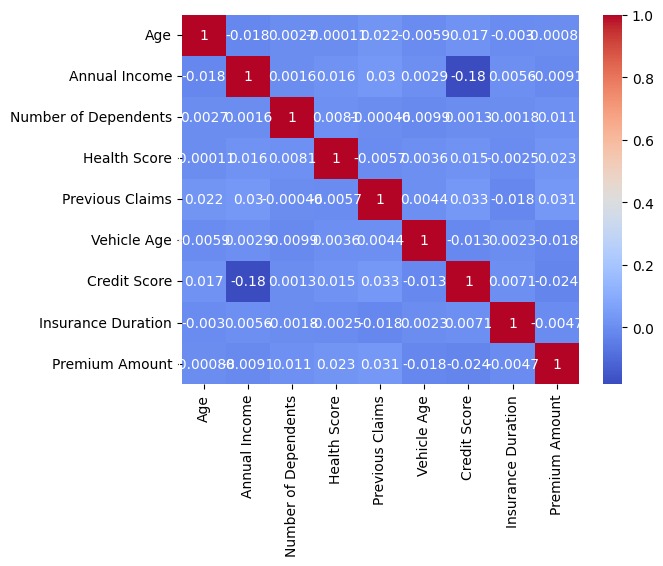

In [ ]:
correlation = sample_df.select_dtypes(include='number').corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

Observations:
1. Credit Score and Annual Income has negative corelation.
2. There is no highly correlated features so there will not be redundancy in model

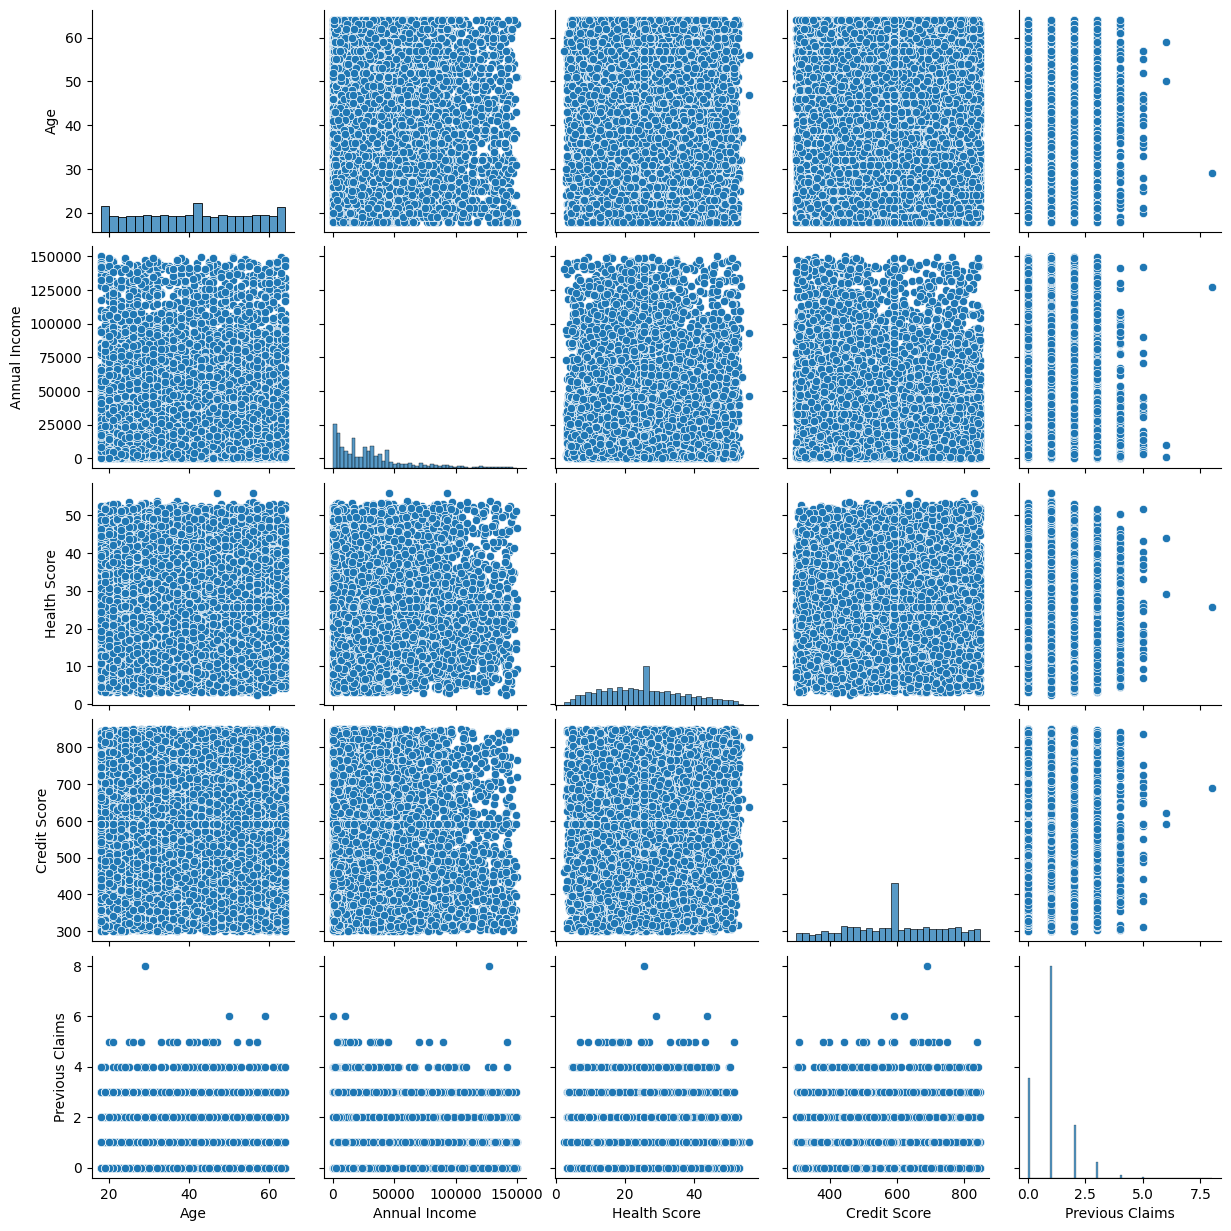

In [ ]:
sns.pairplot(sample_df[['Age', 'Annual Income', 'Health Score', 'Credit Score', 'Previous Claims']])
plt.show()

In [ ]:
print(df.groupby('Marital Status')['Annual Income'].mean())

Marital Status
Divorced    32653.675806
Married     32596.394279
Single      32973.634704
Name: Annual Income, dtype: float64


There is no major difference in salary depands on the marital status

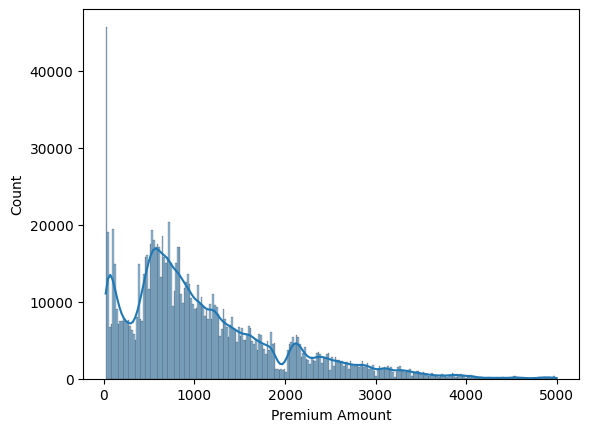

In [ ]:
sns.histplot(df['Premium Amount'], kde=True)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


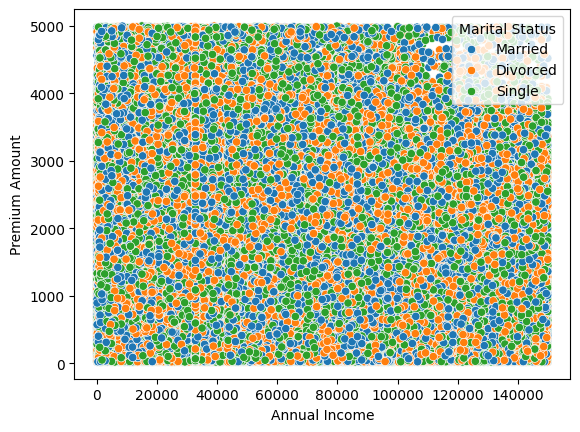

In [ ]:
sns.scatterplot(data=df, x='Annual Income', y='Premium Amount', hue='Marital Status')
plt.show()

In [ ]:
from scipy.stats import zscore
z_scores = df[['Age', 'Annual Income', 'Health Score','Previous Claims','Premium Amount']].apply(zscore)
outliers = (z_scores.abs() > 3).sum()
print(outliers)

Age                    0
Annual Income      25385
Health Score           0
Previous Claims    13055
Premium Amount     15209
dtype: int64


There are outliers in Annual Income, Previous claims and Premium amount

#Handling the Outliers

In [ ]:
df.describe()

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06
mean,4.114556e+01,3.274522e+04,2.100419e+00,2.561391e+01,1.002689e+00,9.569926e+00,5.929244e+02,5.018223e+00,1.102545e+03
std,1.343401e+01,3.157107e+04,1.380815e+00,1.182080e+01,8.203285e-01,5.776198e+00,1.411025e+02,2.594333e+00,8.649989e+02
min,1.800000e+01,1.000000e+00,0.000000e+00,2.012237e+00,0.000000e+00,0.000000e+00,3.000000e+02,1.000000e+00,2.000000e+01
25%,3.000000e+01,8.646000e+03,1.000000e+00,1.655457e+01,0.000000e+00,5.000000e+00,4.840000e+02,3.000000e+00,5.140000e+02
50%,4.114556e+01,2.499600e+04,2.000000e+00,2.561391e+01,1.000000e+00,1.000000e+01,5.929244e+02,5.000000e+00,8.720000e+02
75%,5.300000e+01,4.393600e+04,3.000000e+00,3.377289e+01,1.002689e+00,1.500000e+01,7.060000e+02,7.000000e+00,1.509000e+03
max,6.400000e+01,1.499970e+05,4.000000e+00,5.897591e+01,9.000000e+00,1.900000e+01,8.490000e+02,9.000000e+00,4.999000e+03


Annual Income capped at: Lower = 498.0, Upper = 138543.02000000002
Previous Claims capped at: Lower = 0.0, Upper = 4.0
Premium Amount capped at: Lower = 24.0, Upper = 3841.0


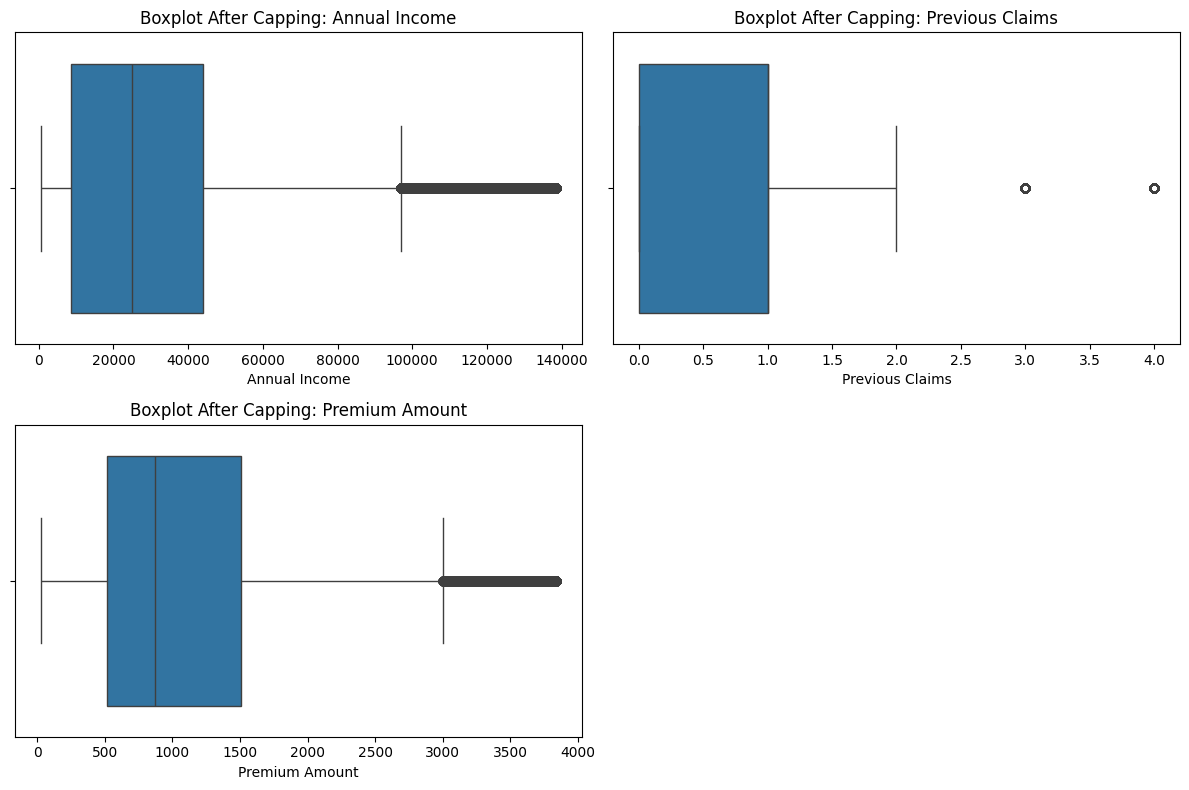

In [ ]:
import numpy as np

# Function to cap outliers using percentiles
def cap_outliers(df, column, lower_percentile=0.01, upper_percentile=0.99):
    lower_cap = df[column].quantile(lower_percentile)
    upper_cap = df[column].quantile(upper_percentile)
    df[column] = np.clip(df[column], lower_cap, upper_cap)
    print(f"{column} capped at: Lower = {lower_cap}, Upper = {upper_cap}")
    return df

# Apply capping to the three columns
columns_to_cap = ['Annual Income', 'Previous Claims', 'Premium Amount']

for col in columns_to_cap:
    df = cap_outliers(df, col)

# Check the updated boxplots
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns_to_cap):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot After Capping: {col}')
plt.tight_layout()
plt.show()


Updated boxplots shows reduced extreme values.

#Feature Engineering

In [ ]:
df.columns

Index(['Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')

In [ ]:
df['Age Group'] = pd.cut(df['Age'], bins=[0, 25, 45, 65, 100], labels=['Young', 'Adult', 'Middle-Aged', 'Senior'])

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Female=0, Male=1
df['Smoking Status'] = le.fit_transform(df['Smoking Status'])

In [ ]:
# Log transformation for skewness
df['Annual Income'] = np.log1p(df['Annual Income'])

# Income per Dependent
df['Income_per_Dependent'] = df['Annual Income'] / (df['Number of Dependents'] + 1)

In [ ]:
df['Marital Status'].unique()

array(['Married', 'Divorced', 'Single'], dtype=object)

In [ ]:
df['Marital Status'] = df['Marital Status'].map({'Married': 1, 'Single': 0,'Divorced': 0})

In [ ]:
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'High School', 'PhD'], dtype=object)

In [ ]:
edu_mapping = {'High School': 1, "Bachelor's": 2, "Master's": 3, 'PhD': 4}
df['Education Level'] = df['Education Level'].map(edu_mapping)

In [ ]:
#one hot encode
df = pd.get_dummies(df, columns=['Occupation'], drop_first=True)
df = pd.get_dummies(df, columns=['Location'], drop_first=True)
df = pd.get_dummies(df, columns=['Policy Type'], drop_first=True)
df = pd.get_dummies(df, columns=['Property Type'], drop_first=True)

In [ ]:
# Standardize Health Score
scaler = StandardScaler()
df['Health Score'] = scaler.fit_transform(df[['Health Score']])
df['Credit Score'] = scaler.fit_transform(df[['Credit Score']])

In [ ]:
df['Vehicle Age'].unique()

array([17., 12., 14.,  0.,  8.,  4., 11., 10.,  9.,  6., 19.,  3., 15.,
       16.,  5.,  7., 18.,  1.,  2., 13.])

In [ ]:
# Bin Vehicle Age
df['Vehicle Age Group'] = pd.cut(df['Vehicle Age'], bins=[0.0, 3.0, 7.0, 15.0,float('inf')], labels=['New', 'Moderate', 'Old', 'Very Old'], include_lowest=True)

In [ ]:
# Flag for High Claims
threshold = df['Previous Claims'].mean() + 2 * df['Previous Claims'].std()
df['High_Claims'] = df['Previous Claims'].apply(lambda x: 1 if x > threshold else 0)

In [ ]:
df['Customer Feedback'].unique()

array(['Poor', 'Average', 'Good'], dtype=object)

In [ ]:
# Map feedback to numerical values
feedback_mapping = {'Poor': 1, 'Average': 2, 'Good': 3}
df['Customer Feedback'] = df['Customer Feedback'].map(feedback_mapping)

In [ ]:
minscaler = MinMaxScaler()
df['Premium Amount'] = minscaler.fit_transform(df[['Premium Amount']])

In [ ]:
df.drop(['Age','Policy Start Date'], axis=1, inplace=True)

In [ ]:
df['Exercise Frequency'].unique()

array(['Weekly', 'Monthly', 'Daily', 'Rarely'], dtype=object)

In [ ]:
df['Exercise Frequency']=df['Exercise Frequency'].map({'Daily':4,'Weekly': 3, 'Monthly': 2, 'Rarely':1})

In [ ]:
df['Age Group'].unique()

['Young', 'Adult', 'Middle-Aged']
Categories (4, object): ['Young' < 'Adult' < 'Middle-Aged' < 'Senior']

In [ ]:
df['Age Group']=df['Age Group'].map({'Senior':4,'Middle-Aged': 3, 'Adult': 2, 'Young':1})

In [ ]:
df['Vehicle Age Group'].unique()

['Very Old', 'Old', 'New', 'Moderate']
Categories (4, object): ['New' < 'Moderate' < 'Old' < 'Very Old']

In [ ]:
df['Vehicle Age Group']=df['Vehicle Age Group'].map({'Very Old':4,'Old': 3, 'Moderate': 2, 'New':1})

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df.sample(5)

,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Premium Amount,Age Group,Income_per_Dependent,Occupation_Self-Employed,Occupation_Unemployed,Location_Suburban,Location_Urban,Policy Type_Comprehensive,Policy Type_Premium,Property Type_Condo,Property Type_House,Vehicle Age Group,High_Claims
850469,1,10.235091,0,4.0,3,1.122205,1.002689,6.0,5.604130e-01,1.0,3,1,3,0.791459,2,2.047018,False,False,False,False,True,False,False,False,2,0
416454,0,9.732877,0,2.0,2,-1.075988,1.002689,11.0,8.438950e-01,8.0,1,0,3,0.206707,2,3.244292,False,True,False,False,False,False,False,False,3,0
143118,1,9.546098,0,2.0,3,0.551858,1.002689,1.0,2.344088e-01,8.0,2,1,2,0.859052,2,3.182033,False,True,True,False,False,True,False,True,1,0
220821,0,8.677610,1,4.0,3,0.000487,0.000000,18.0,-1.069608e+00,9.0,2,0,2,0.242599,2,1.735522,False,False,True,False,False,False,False,False,4,0
493290,0,9.916206,1,3.0,3,-0.151463,2.000000,19.0,-1.611408e-15,1.0,2,0,1,0.134399,3,2.479052,False,False,False,False,False,True,False,True,4,0


#Building Random Forest to Analyze Feature Importance

In [ ]:
df_sample = df.sample(frac=0.1, random_state=42)  # Use 10% of the data
X = df_sample.drop('Premium Amount', axis=1)
y = df_sample['Premium Amount']

In [ ]:
X.shape,y.shape

((120000, 25), (120000,))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                      Feature  Importance
5                Health Score    0.157832
1               Annual Income    0.141503
8                Credit Score    0.129580
14       Income_per_Dependent    0.119403
7                 Vehicle Age    0.073270
9          Insurance Duration    0.059070
12         Exercise Frequency    0.034448
4             Education Level    0.034146
6             Previous Claims    0.026858
10          Customer Feedback    0.026329
13                  Age Group    0.025297
11             Smoking Status    0.014795
0                      Gender    0.014480
2              Marital Status    0.014046
18             Location_Urban    0.013235
20        Policy Type_Premium    0.013196
17          Location_Suburban    0.013175
19  Policy Type_Comprehensive    0.013142
22        Property Type_House    0.013130
21        Property Type_Condo    0.013123
15   Occupation_Self-Employed    0.012838
16      Occupation_Unemployed    0.012669
23          Vehicle Age Group    0

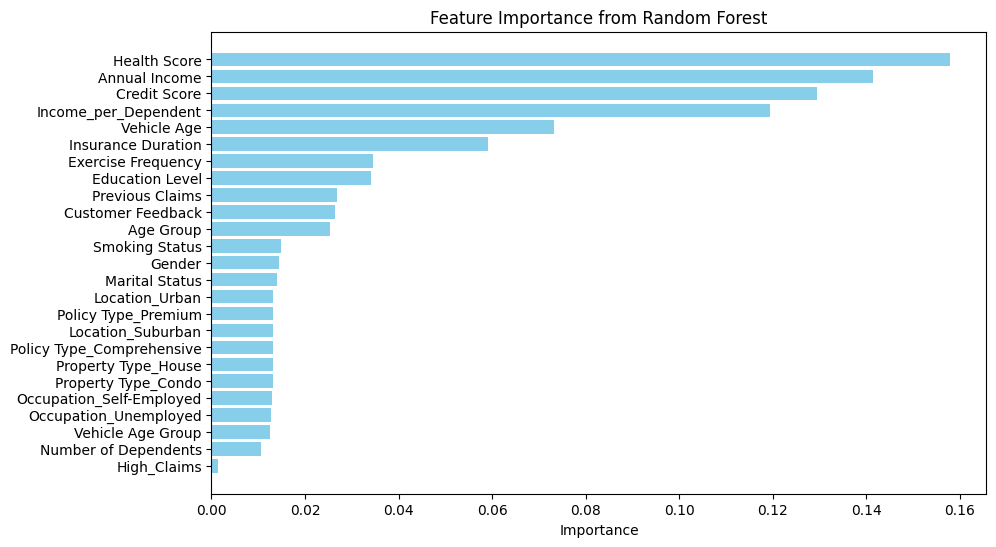

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # Reverse order for better visualization
plt.show()

Observation:
1.High_claims is less important feature so it needs to be dropped to simplify the model.

In [ ]:
df.drop('High_Claims',axis=1,inplace=True)

In [ ]:
df.head()

,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Premium Amount,Age Group,Income_per_Dependent,Occupation_Self-Employed,Occupation_Unemployed,Location_Suburban,Location_Urban,Policy Type_Comprehensive,Policy Type_Premium,Property Type_Condo,Property Type_House,Vehicle Age Group
0,0,9.215328,1,1.0,2,-0.255071,2.0,17.0,-1.565702e+00,5.0,1,0,3,0.745350,1,4.607664,True,False,False,True,False,True,False,True,4
1,0,10.363409,0,3.0,3,-0.849704,1.0,12.0,7.163281e-01,2.0,2,1,2,0.382237,2,2.590852,False,False,False,False,True,False,False,True,3
2,1,10.150465,0,3.0,1,1.824212,1.0,14.0,-1.611408e-15,3.0,3,1,3,0.142258,1,2.537616,True,False,True,False,False,True,False,True,3
3,1,11.838943,1,2.0,2,-1.241521,1.0,0.0,-1.601137e+00,1.0,1,1,4,0.194132,1,3.946314,False,False,False,False,False,False,False,False,1
4,1,10.587897,0,1.0,2,-0.443102,0.0,8.0,3.597138e-02,4.0,1,1,3,0.523448,1,5.293948,True,False,False,False,False,True,False,True,3


#Model Training

In [ ]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 5.3 MB/s eta 0:00:00


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X = df.drop(columns=['Premium Amount'])
y = df['Premium Amount']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize XGBoost Regressor
xgb_reg = xgb.XGBRegressor(
    n_estimators=100,       # Number of boosting rounds
    max_depth=6,            # Maximum depth of trees
    learning_rate=0.1,      # Step size shrinkage
    random_state=42,
    enable_categorical=True
)

# Train the model
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

#Evaluating the Model

In [ ]:
# Predict on test data
y_pred = xgb_reg.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 0.047492875250570825
R2 Score: 0.03960482810721955


#Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2]
}

xgb_reg = xgb.XGBRegressor(random_state=42, enable_categorical=True)

# Grid Search
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=3, scoring='r2', verbose=2)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.8s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   3.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   3.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   3.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   2.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   3.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   4.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   4.3s
[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=100; total time=   3.0s
[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=100; total time=   2.9s
[CV] END ..learning_rate=0.01, max_depth=6, n_es

#Best Parameters: {'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 300}


In [ ]:
final_xgb = xgb.XGBRegressor(
    n_estimators=300,
    max_depth=9,
    learning_rate=0.01,
    random_state=42,
    enable_categorical=True
)

final_xgb.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Predict on test data
y_pred = final_xgb.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 0.04671494792945025
R2 Score: 0.055335980187314115


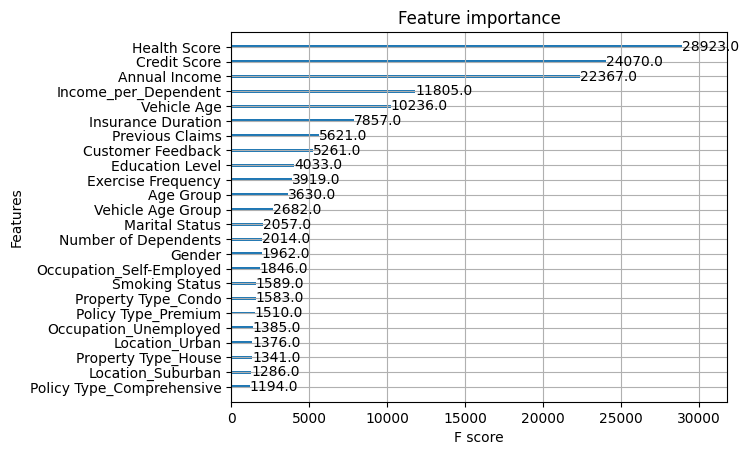

In [ ]:
# Plot feature importance
xgb.plot_importance(final_xgb, importance_type='weight')
plt.show()